## Using Fine Tuned Gemini in python

The first step is to install the Google Cloud CLI. You can download it from here and follow the straightforward installation instructions. Alternatively, you can install it by opening a PowerShell terminal and running the following commands:

In [ ]:
import os
import requests
import subprocess

# Define the download URL and the local path
url = "https://dl.google.com/dl/cloudsdk/channels/rapid/GoogleCloudSDKInstaller.exe"
local_path = os.path.join(os.environ['TEMP'], 'GoogleCloudSDKInstaller.exe')

# Download the file
response = requests.get(url)
with open(local_path, 'wb') as file:
    file.write(response.content)

print(f"Downloaded to: {local_path}")

# Execute the installer
subprocess.run(local_path, shell=True)

Once the installation is complete, you’ll need to add the Google Cloud CLI path to your environment variables. To do this, search for “environment variables” in your system’s search bar and add a new variable named “gcloud”. Set its value to the path where the SDK is installed (for example, C:\users\faree\AppData\Local\Google\Cloud SDK\google-cloud-sdk\bin, where “faree” is your username).

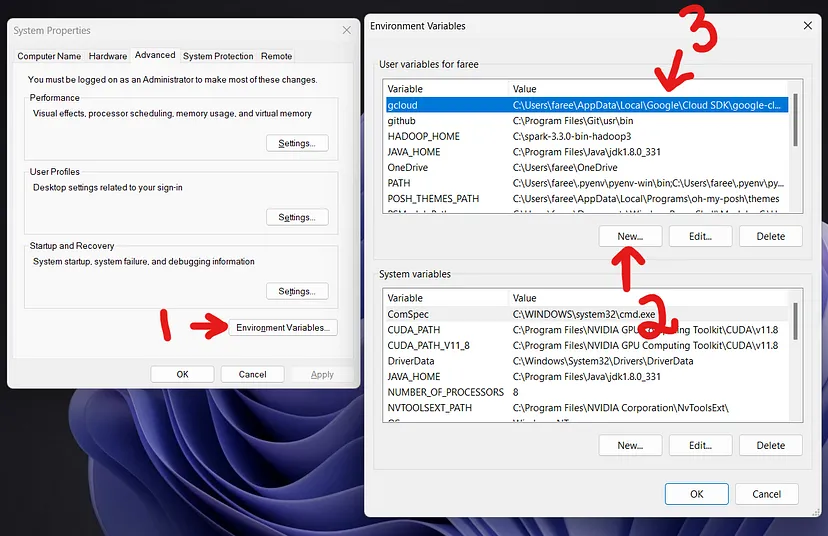

Navigate to console.cloud.google.com and select “APIs & Services”. Ensure that the selected project is either “Generative Language Client” or the project associated with your Gemini API key.

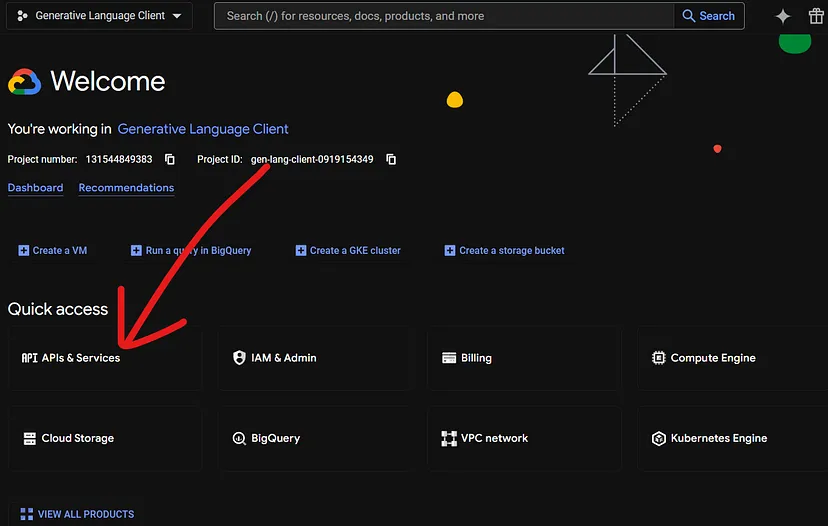

Under the “Credentials” tab within the Generative Language API section, create a new credential and select “OAuth Client ID”.

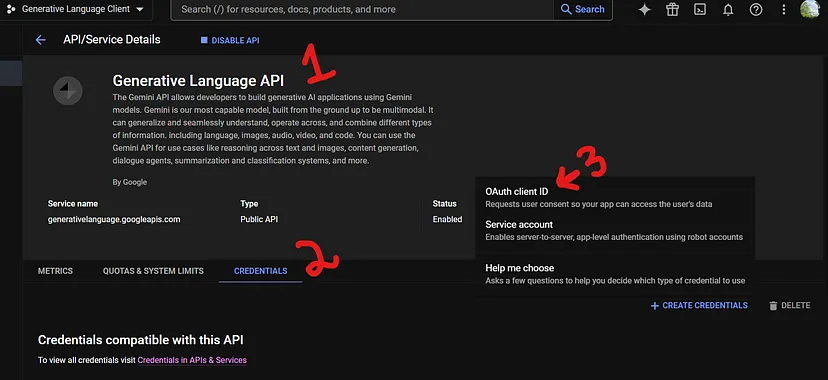

You can choose any application type except for “Web application”. Selecting “Web application” will prevent you from fine-tuning Gemini on your local machine.

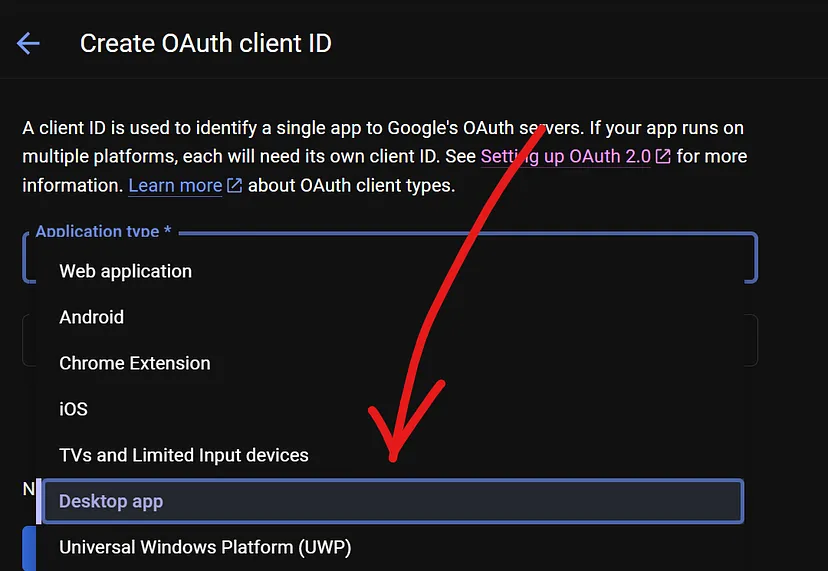

Assign a name to the credential and create it. Once created, download the credential JSON file. This file will be used to authorize your environment to access fine-tuned Gemini LLMs.

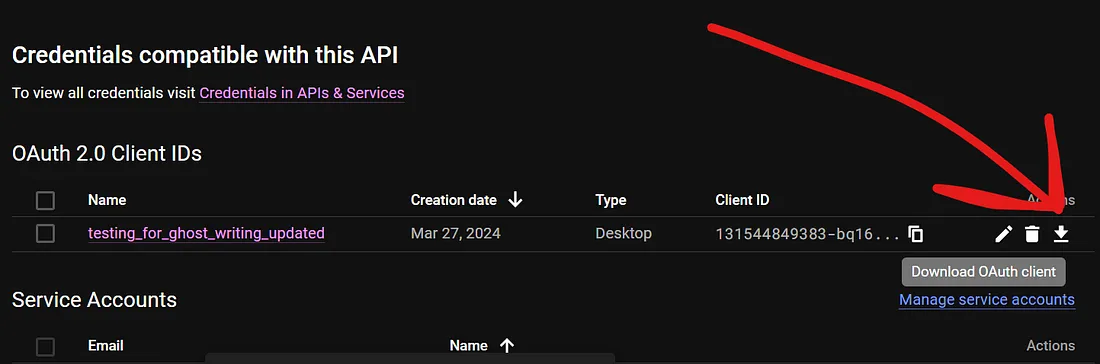

Copy the downloaded JSON file and place it in the directory where you’ll be writing your fine-tuning code. Next, open a command prompt or terminal within that directory and execute the following command: `gcloud auth application-default login --client-id-file client_secret.json --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.tuning'`

The command will generate a link. Open the link and sign in using the same account you used to create the credentials JSON file. Click “Continue” and grant all necessary permissions.

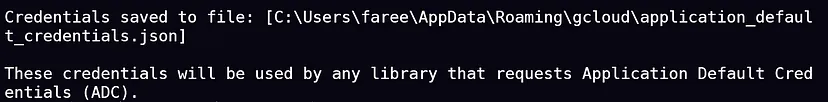

Next, we need to install the necessary libraries to interact with the Gemini API

In [ ]:
# Install necessary libraries
% pip install google-generativeai grpcio grpcio-tools

### Import the libraries

In [ ]:
# Importing the generativeai module from the google package.
import google.generativeai as genai

# Configuring the generativeai module to use gRPC (Google Remote Procedure Call) as the transport protocol.
genai.configure(transport='grpc')

You can check you existing tuned models with the genai.list_tuned_model method.

In [ ]:
# genai.list_tuned_models() returns a generator of tuned models.
for i, m in zip(range(5), genai.list_tuned_models()):
  
  # Printing the name of the current tuned model (m).
  print(m.name)